<a href="https://colab.research.google.com/github/johntomczak/Corona_DA/blob/master/Daily_OpenTable_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Hello everyone. Thanks for checking out my work. I will have plenty more to come too.

Please feel free to reach out with tips, criticism, or ways I can help you at johnjtomczak@icloud.com

I found this data set a few days ago a few times. It was all over Hacker News and Twitter and maybe an email newsletter or two. I am using it as a muse to learn some Python data science and modeling tools. Enjoy.

# Importing and Formatting

In [0]:
# the 'capture' magic suppresses the pip output below
%%capture
!pip install xlrd
!pip install psycopg2

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import datetime
from scipy.stats import norm

In [0]:
# # post_offset is: 
# #   0 if the dataset is current, 
# #   1 if OpenTable hasn't posted yet today
# post_offset = 0 

# # They keep changing their formats so I download what I can and make some edits in Excel before uploading
# latest=datetime.datetime.now() - datetime.timedelta(days=(1+post_offset)) - datetime.timedelta(hours=4)
# latest=latest.strftime("%m_%d")
# print( latest )

latest = '03_18'
print( latest )
fl = "https://github.com/johntomczak/Corona_DA/blob/master/opentable_"+str(latest)+".xlsx?raw=true"

print( latest )
d1 = pd.read_excel(fl)
d1 = d1.set_index('Name')

03_18
03_18


In [0]:
# please blame my friend Rem if you go blind on this one - he is the King of One-Lining
d1.columns = pd.Series(d1.columns).apply(lambda x: x.strftime('%m_%d') if type(x) != str else x)

In [0]:
# NOLA has to go because of Mardi Gras moving around on the calendar
d1 = d1.drop('New Orleans')
# just want to stick to N. Am. cities, idk
d1 = d1.drop('London')
d1 = d1.drop('Hamburg')
d1 = d1.drop('Munchen')
d1 = d1.drop('Dublin')

In [0]:
info = d1.describe()
print( info.iloc[:,-3:] )

           03_16      03_17      03_18
count  43.000000  43.000000  43.000000
mean   -0.668837  -0.924651  -0.969302
std     0.137134   0.109291   0.062503
min    -1.000000  -1.000000  -1.000000
25%    -0.760000  -1.000000  -1.000000
50%    -0.660000  -0.990000  -1.000000
75%    -0.580000  -0.880000  -0.970000
max    -0.400000  -0.550000  -0.750000


# Analyses

In [0]:
dt = datetime.datetime.now() - datetime.timedelta(days=(1+post_offset)) - datetime.timedelta(hours=4)
t0s = dt
t0 = t0s.strftime('%m_%d')
t1s = t0s - datetime.timedelta( days=1 )
t1 = t1s.strftime('%m_%d')
t2s = t1s - datetime.timedelta(days=1)
t2 = t2s.strftime('%m_%d')

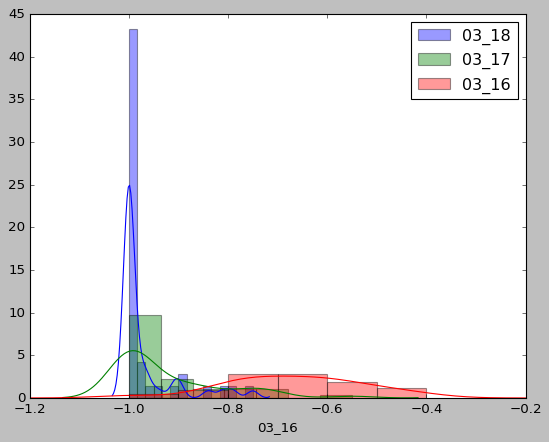

In [0]:
plt.style.use('classic')
fri = sns.distplot( d1[t0] )
sat = sns.distplot( d1[t1] )
sun = sns.distplot( d1[t2] )
plt.legend( [str(t0), str(t1), str(t2)] )

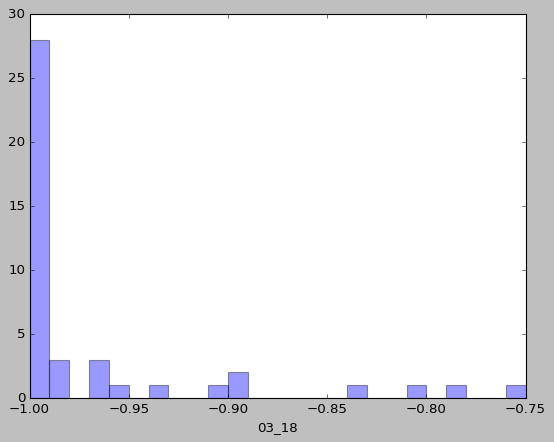

In [0]:
dist_today = sns.distplot( d1[t0], bins=25, kde=False )

In [0]:
print( t0 )
print( d1[t0].sort_values() )
print( "shutdown " + str( sum( d1[t0]<=-0.995) ) )
print ( sum( d1[t0]==-1) / d1[t0].describe()['count'] )
print( d1[t0].describe() )

03_18
Name
Miami Beach              -1.00
Toronto                  -1.00
Seattle                  -1.00
San Francisco            -1.00
San Diego                -1.00
Raleigh                  -1.00
Portland                 -1.00
Pittsburgh               -1.00
Philadelphia             -1.00
New York                 -1.00
Minneapolis              -1.00
Miami                    -1.00
Louisville               -1.00
Los Angeles              -1.00
Las Vegas                -1.00
Indianapolis             -1.00
Washington               -1.00
Fort Lauderdale          -1.00
Chicago                  -1.00
Denver                   -1.00
Cincinnati               -1.00
Dallas                   -1.00
Houston                  -1.00
Austin                   -1.00
Charlotte                -1.00
Columbus                 -1.00
Baltimore                -1.00
Boston                   -1.00
Phoenix                  -0.99
Calgary                  -0.99
Vancouver                -0.99
Edmonton                 -0.